In [1]:
from analysis import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import sklearn
from sklearn.linear_model import LinearRegression
from scipy import stats
from matplotlib import rc

In [2]:
rc('text', usetex=True)
rc('font', family='sans-serif')

In [3]:
q_set = np.array([[0.05, 5], [0.1786, 15], [0.3071, 27], [0.4357, 39], 
                  [0.5643, 52], [0.6929, 67], [0.8214, 80], [0.95, 102]])
q_thresh = [j for (i,j) in q_set]
data_path = "arm3_q_v2/data"
files = get_files_in_directory(data_path)
N = len(files)

In [4]:
pop_acc = []
for f in files:
    pid, df, acc = load(f, q_thresh, True)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
print(pop_mean_acc)

60cd99f1d0df72833ad4346a,1.09
6167eea0a4fd7219518e8a16,1.14
5e5c993cd0394c474f7cc502,1.04
60399f04cc8c6352878f05c5,1.32
0.6013999999999999


# theoretical predictions

In [5]:
path = '../model/sims/'
df_q = pd.read_csv(path+'q_simulate_1000_eps0.35_2023-07-29.csv')

Text(0.5, 1.0, 'Model predictions for mean commitment time as a function of $q$')

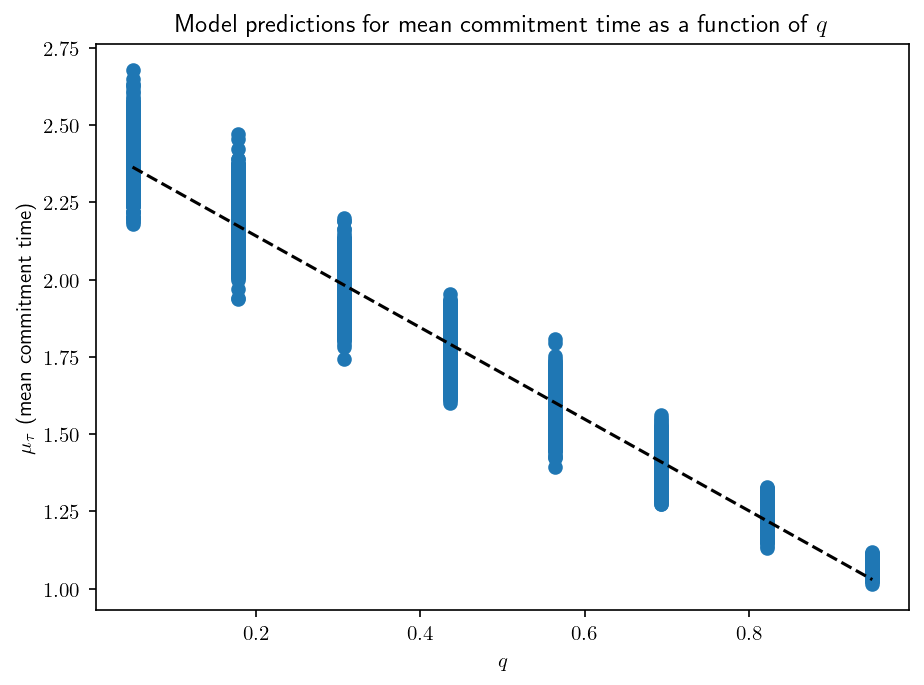

In [7]:
fig, ax = plt.subplots(figsize=(7,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
x,y = np.array(df_q['q']).reshape(-1,1), np.array(df_q['mu_i']).reshape(-1,1)
plt.scatter(np.array(df_q['q']), np.array(df_q['mu_i']))
fit_q, fit_mu, __, __ = get_linear_fit(x,y)
plt.plot(fit_q, fit_mu, 'k--')
plt.xlabel('$q$')
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.title('Model predictions for mean commitment time as a function of $q$')

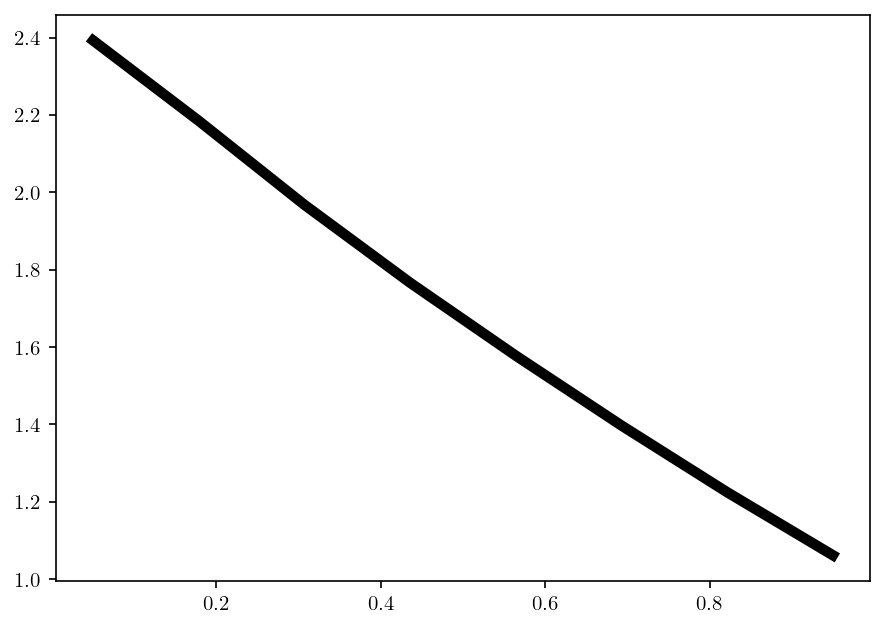

In [8]:
mdl_avg_q = []
for f in df_q['q'].unique():
    q_level = df_q[df_q['q'] == f]['mu_i']
    mdl_avg_q.append(np.mean(q_level))
fig, ax = plt.subplots(figsize=(7,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
plt.plot(df_q['q'].unique(), mdl_avg_q, c='black', linewidth=5)

# comparison before and after discarding first 70 trials

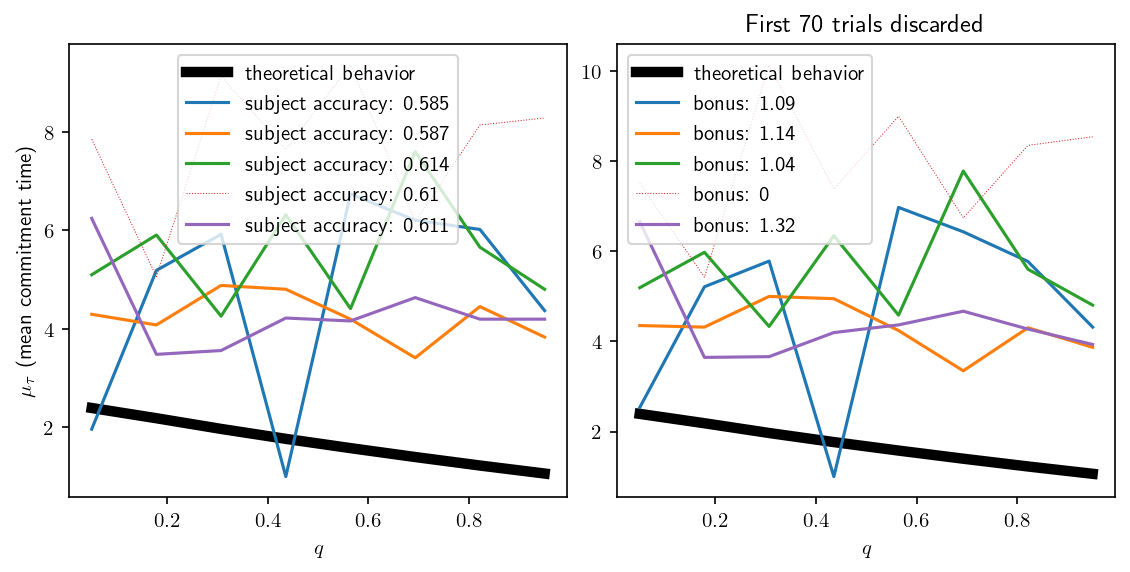

In [9]:
fig, ax = plt.subplots(figsize=(9,4),dpi=150)
plt.subplots_adjust(wspace=0.1)
plt.subplot(121)
plt.plot(df_q['q'].unique(), mdl_avg_q, c='black', linewidth=5, label = 'theoretical behavior')
pop_acc = []
for f in files:
    pid, df, acc = load(f, q_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc = load(f, q_thresh)
    if np.abs(acc - pop_mean_acc) < 2*np.std(pop_acc):
        q, __, mu_i, __ = get_mean_iai(df)
        xy = np.concatenate((q[:,0].reshape(-1,1), mu_i[:,0].reshape(-1,1)), axis=1)
        xy = pd.DataFrame(xy, columns = ["x", "y"])
        xy = xy.sort_values('x')
        if compute_bonus(df, q_thresh) == 0:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]), linestyle = 'dotted', linewidth=0.5, label = 'subject accuracy: ' + str(acc))
        else:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]), label = 'subject accuracy: ' + str(acc))
        x,y,l,c = get_linear_fit(q,mu_i)
plt.xlabel('$q$')
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.legend()


plt.subplot(122)
discard = 70
pop_acc = []
plt.plot(df_q['q'].unique(), mdl_avg_q, c='black', linewidth=5, label = 'theoretical behavior')
for f in files:
    pid, df, acc = load(f, q_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc = load(f, q_thresh)
    if np.abs(acc - pop_mean_acc) < 2*np.std(pop_acc):
        q, __, mu_i, __ = get_mean_iai(df, discard)
        xy = np.concatenate((q[:,0].reshape(-1,1), mu_i[:,0].reshape(-1,1)), axis=1)
        xy = pd.DataFrame(xy, columns = ["x", "y"])
        xy = xy.sort_values('x')
        if compute_bonus(df, q_thresh) == 0:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]), linestyle = 'dotted', linewidth=0.5, label = 'bonus: ' + str(compute_bonus(df,q_thresh)))
        else:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]), label = 'bonus: ' + str(compute_bonus(df,q_thresh)))
        x,y,l,c = get_linear_fit(q,mu_i)
plt.xlabel('$q$')
plt.title("First 70 trials discarded")
plt.legend()

Text(0.5, 1.0, 'Accuracy across blocks for arm3\\_q')

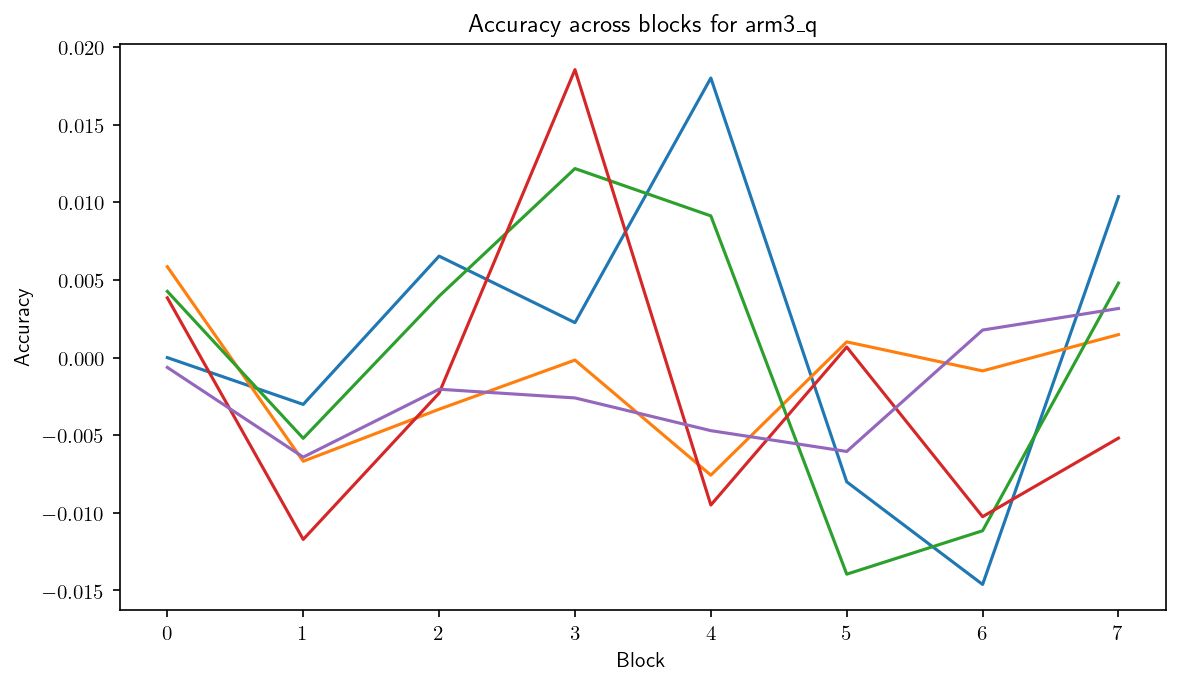

In [12]:
fig, ax = plt.subplots(figsize=(9,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
belief = []
for f in files:
    pid, df, acc = load(f, q_thresh)
    q, eps, thr = get_abs_threshold(df)
    belief.append(thr)
    plt.plot(thr)
#     plt.plot(down_price)
plt.xlabel('Block')
plt.ylabel('Accuracy')
plt.title('Accuracy across blocks for arm3\_q')
# plt.plot(fit_q, fit_mu, 'k--')

array([[0.        ],
       [0.00491108],
       [0.030949  ],
       [0.04141639],
       [0.04946943],
       [0.04483132],
       [0.03974703],
       [0.05619864]])

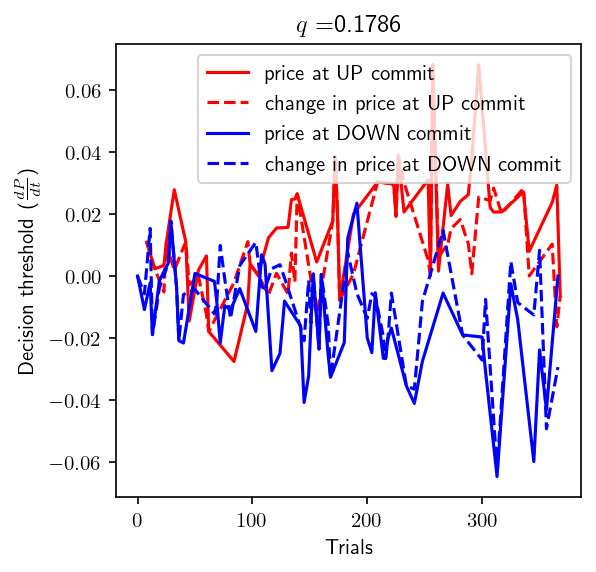

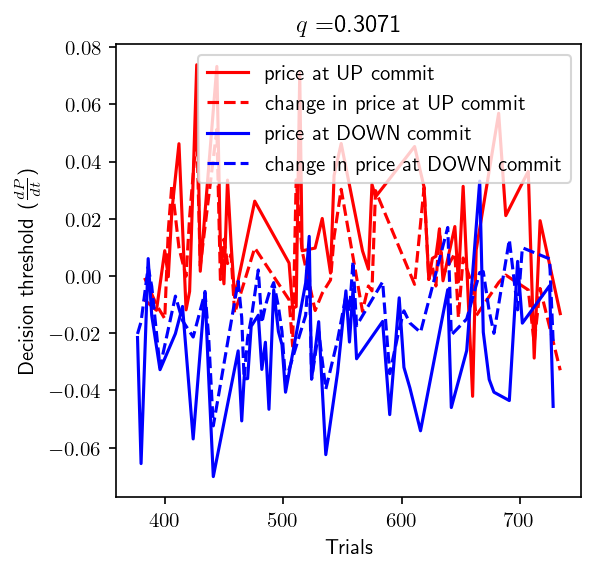

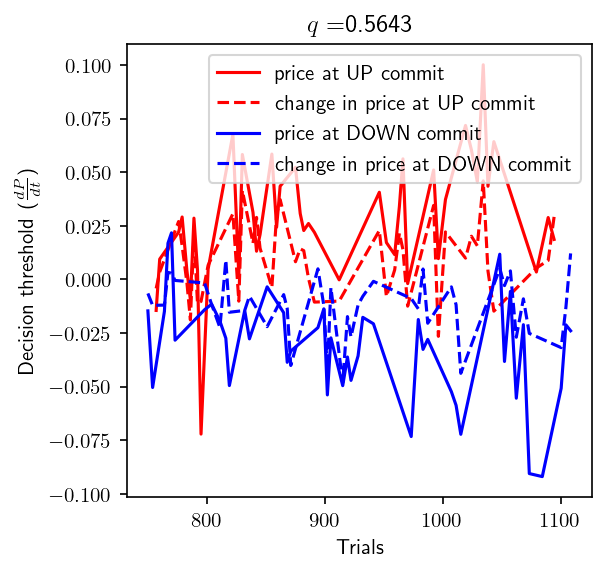

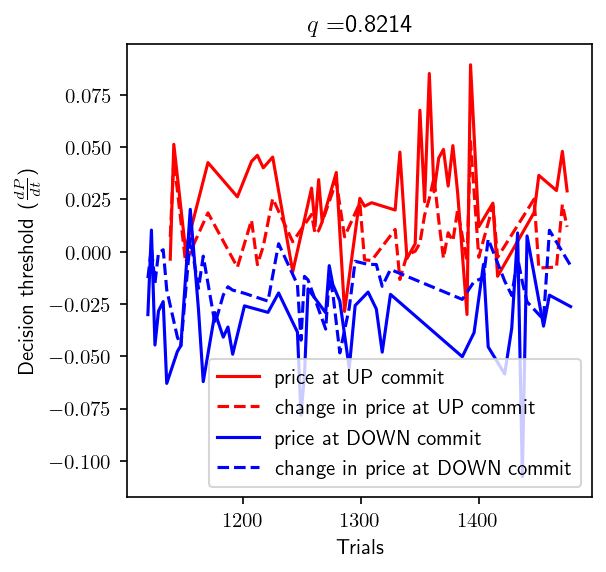

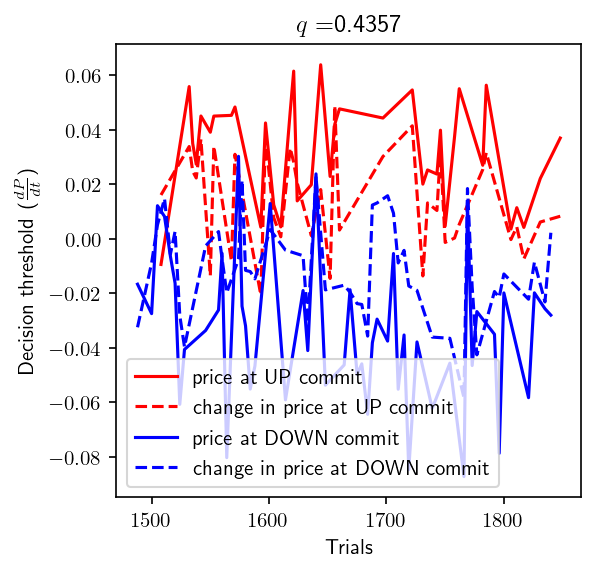

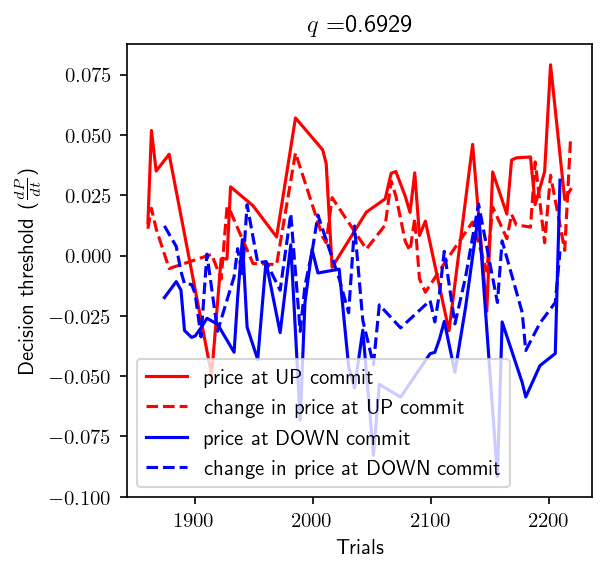

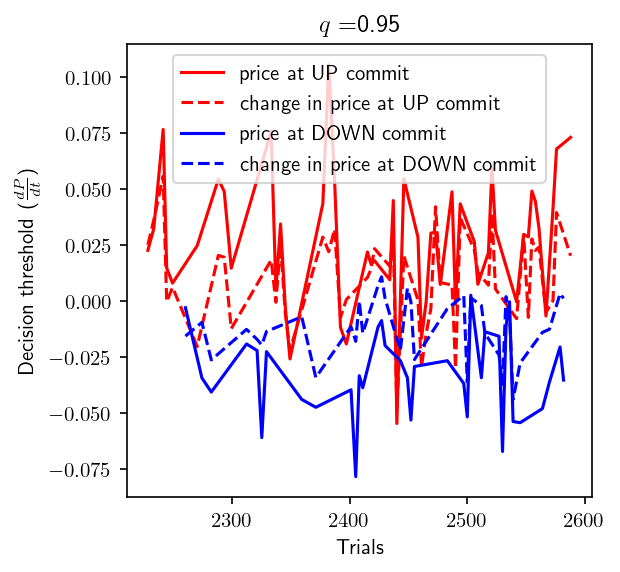

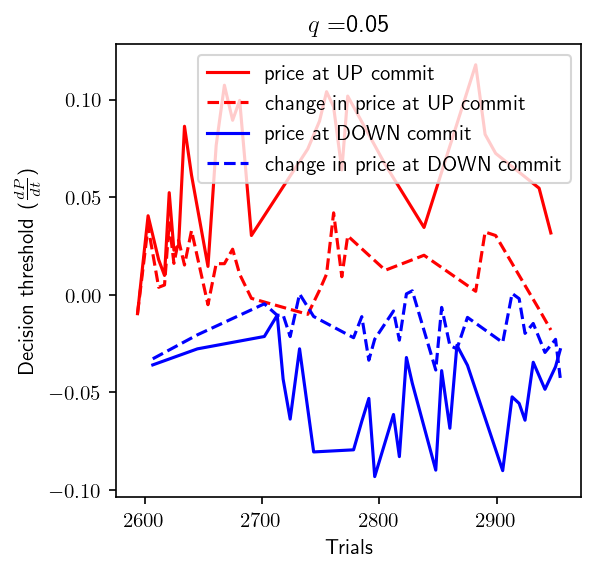

In [27]:
for i in range(1,numBlocks+1):
    fig, ax = plt.subplots(figsize=(4,4),dpi=150)
    curBlock = block(i,df, 0)
    ups = curBlock.index[curBlock['resp.keys'] == 1]
    ups = ups - 1
    ups = ups[1:]
    downs = curBlock.index[curBlock['resp.keys'] == -1]
    downs = downs - 1
    downs = downs[1:]
    both = curBlock.index[np.abs(curBlock['resp.keys']) == 1]
    both = both - 1
    both = both[1:]
    plt.plot(df.iloc[ups]['price'], 'r', label = 'price at UP commit')
    plt.plot(df.iloc[ups]['dPrice_dt'], 'r--', label = 'change in price at UP commit')
    plt.plot(df.iloc[downs]['price'], 'b', label = 'price at DOWN commit')
    plt.plot(df.iloc[downs]['dPrice_dt'], 'b--', label = 'change in price at DOWN commit')
    plt.xlabel('Trials')
    plt.ylabel('Decision threshold ($\\frac{dP}{dt}$)')
    plt.title('$q = $' + str(curBlock['q_prob'].iloc[0]))
    plt.legend()
    plt.show()